# Models development (article version)

In this notebook we make linear models for clusters having unimodal fire seasons using the detrended time series.

We consider linear models. For each cluster we develop several models depending of the lt and the duration parameters.

We use the functions defined in the file "scripts/modelling_functions_article.R".

In [1]:
setwd("..")

In [2]:
source("scripts/modelling_functions_article.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, un

In [3]:
# Data required
library('ggplot2')
load('data/fireSeason_def_2.Rdata', verbose = T)
load("data/Fire/ba_mon_time_series_masked.Rdata", verbose = T)
load("data/Fire/ba_mon_clim_masked_df.Rdata", verbose = T)
load('data/Correlation/corrDfArticleLT1D1.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT1D2.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT1D3.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT2D1.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT2D2.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT2D3.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT3D1.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT3D2.Rdata', verbose = T)
load('data/Correlation/corrDfArticleLT3D3.Rdata', verbose = T)

Loading objects:
  fireSeason_def_2
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  df_masked
  masked_coords
Loading objects:
  corr.df.lt1.1
Loading objects:
  corr.df.lt1.2
Loading objects:
  corr.df.lt1.3
Loading objects:
  corr.df.lt2.1
Loading objects:
  corr.df.lt2.2
Loading objects:
  corr.df.lt2.3
Loading objects:
  corr.df.lt3.1
Loading objects:
  corr.df.lt3.2
Loading objects:
  corr.df.lt3.3


## Climate indices data loading

In [4]:
nino34 = read.table("data/CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nino34) = c("Year", month.abb)
nino34[,-1] = (nino34[,-1] - mean(as.matrix(nino34[32:61,-1]))) / sd(as.matrix(nino34[32:61,-1]))

In [5]:
nao = read.table("data/CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", month.abb)

In [6]:
poleur = read.table("data/CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", month.abb)

In [7]:
ea = read.table("data/CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", month.abb)

In [8]:
eawr = read.table("data/CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", month.abb)

In [9]:
pna = read.table("data/CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", month.abb)

In [10]:
scand = read.table("data/CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", month.abb)

In [11]:
wp = read.table("data/CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", month.abb)

## LT1
### 1 month duration

In [12]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt1.1, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=1, duration=1, mode = 'unimodal')
table.lt1.d1 = lm.list$results
save(table.lt1.d1, file = 'data/ModelData/models_results_per_clusterarticle_lt1_d1.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,84.83831,-0.5977848,0.3789672,0.02815998,0.5029740,0.5789474,0.6666667,0.3333333,0.7142857
3,1,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,3,4,83.58547,-6.5682155,0.5537224,0.01436937,0.5515262,0.4736842,0.5000000,0.3333333,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,2,89.35838,-1.3100830,0.3800523,0.06213317,0.4358434,0.3157895,0.5000000,0.0000000,0.4285714
7,1,6,1,96.87428,-2.3065353,0.2172435,0.31462941,0.2437337,0.4210526,0.5000000,0.3333333,0.4285714
8,2,1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,2,2,1,89.92990,-1.7141011,0.3303574,0.06737092,0.4170060,0.4500000,0.5714286,0.1666667,0.5714286
10,2,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 2 months duration

In [13]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt1.2, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=1, duration=2, mode = 'unimodal')
table.lt1.d2 = lm.list$results
save(table.lt1.d2, file = 'data/ModelData/models_results_per_clusterarticle_lt1_d2.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,85.52111,-0.8529471,0.3668835,0.032739844,0.49111180,0.4736842,0.5000000,0.1666667,0.7142857
3,1,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,3,3,82.10151,-4.0556506,0.5189238,0.012338879,0.56162331,0.5263158,0.6666667,0.3333333,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,1,96.88198,1.5932793,0.3057366,0.236821647,0.28506775,0.5263158,0.5000000,0.3333333,0.7142857
7,1,6,1,91.83582,-1.6405946,0.2677678,0.124327250,0.36506545,0.5263158,0.5000000,0.5000000,0.5714286
8,2,1,1,82.83004,-0.7469202,0.4904565,0.019200874,0.54551475,0.6111111,0.6666667,0.5000000,0.6666667
9,2,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,2,3,1,95.38936,-0.5385079,0.2513939,0.228194558,0.29015304,0.3684211,0.3333333,0.1666667,0.5714286
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 3 months duration

In [14]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt1.3, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=1, duration=3, mode = 'unimodal')
table.lt1.d3 = lm.list$results
save(table.lt1.d3, file = 'data/ModelData/models_results_per_clusterarticle_lt1_d3.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,85.63734,-0.7669925,0.3665070,0.033484780,0.4893065,0.4736842,0.5000000,0.1666667,0.7142857
3,1,2,1,90.05554,-1.1630337,0.2610972,0.092843605,0.3964803,0.5789474,0.5000000,0.5000000,0.7142857
4,1,3,2,76.07603,-3.4861909,0.4625835,0.004060498,0.6270498,0.5263158,0.6666667,0.3333333,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,1,94.54100,1.3191626,0.3487440,0.150150671,0.3433030,0.5263158,0.5000000,0.3333333,0.7142857
7,1,6,2,81.20910,-1.0270707,0.5443364,0.010026122,0.5749033,0.4210526,0.6666667,0.1666667,0.4285714
8,2,1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,2,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,2,3,1,93.42594,-0.2182874,0.3063035,0.144534488,0.3477991,0.3684211,0.3333333,0.1666667,0.5714286
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


## LT2
### 1 month duration

In [15]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt2.1, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=2, duration=1, mode = 'unimodal')
table.lt2.d1 = lm.list$results
save(table.lt2.d1, file = 'data/ModelData/models_results_per_clusterarticle_lt2_d1.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,86.73142,-1.15361939,0.3444794,0.042775323,0.46905184,0.4736842,0.5000000,0.1666667,0.7142857
3,1,2,1,85.88475,-0.33860291,0.3568115,0.035749587,0.48400293,0.5789474,0.5000000,0.5000000,0.7142857
4,1,3,1,82.51346,-2.69402691,0.4420730,0.015915151,0.54458023,0.4736842,0.5000000,0.3333333,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,1,95.73643,1.56881092,0.3386116,0.182939523,0.31913001,0.5263158,0.5000000,0.3333333,0.7142857
7,1,6,1,89.46228,-1.72687402,0.3010274,0.076445479,0.41603958,0.4210526,0.5000000,0.1666667,0.5714286
8,2,1,2,75.67704,1.22083172,0.6117724,0.004011984,0.64279819,0.6666667,0.6666667,0.5000000,0.8333333
9,2,2,1,94.75664,1.32967270,0.2360875,0.199402091,0.29958999,0.5500000,0.5714286,0.5000000,0.5714286
10,2,3,2,85.99366,0.59646111,0.5321894,0.023988407,0.51517452,0.5263158,0.5000000,0.3333333,0.7142857
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 2 months duration

In [16]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt2.2, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=2, duration=2, mode = 'unimodal')
table.lt2.d2 = lm.list$results
save(table.lt2.d2, file = 'data/ModelData/models_results_per_clusterarticle_lt2_d2.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,86.49807,-0.89521996,0.3511247,0.0404611934,0.4737525,0.5263158,0.5000000,0.3333333,0.7142857
3,1,2,3,78.57477,-3.45299603,0.5357909,0.0060866327,0.6047659,0.5263158,0.5000000,0.3333333,0.7142857
4,1,3,1,83.22992,-2.79253644,0.4171909,0.0191403533,0.5316645,0.5789474,0.5000000,0.5000000,0.7142857
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,1,92.82873,1.13708478,0.3777557,0.1075638244,0.3809695,0.5263158,0.5000000,0.3333333,0.7142857
7,1,6,1,88.48552,-1.65183972,0.3403711,0.0589691159,0.4406757,0.5263158,0.6666667,0.3333333,0.5714286
8,2,1,1,92.58511,-0.80183864,0.2836769,0.1506408635,0.3530903,0.4444444,0.6666667,0.1666667,0.5000000
9,2,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,2,3,1,92.59649,0.10748827,0.3467771,0.1135869851,0.3750637,0.3684211,0.3333333,0.1666667,0.5714286
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 3 months duration

In [17]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt2.3, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=2, duration=3, mode = 'unimodal')
table.lt2.d3 = lm.list$results
save(table.lt2.d3, file = 'data/ModelData/models_results_per_clusterarticle_lt2_d3.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,86.57095,-0.5768879,0.3477911,0.041302392,0.4720204,0.5263158,0.5000000,0.3333333,0.7142857
3,1,2,2,81.07583,-3.5129555,0.5083045,0.010482878,0.5720978,0.4736842,0.5000000,0.1666667,0.7142857
4,1,3,1,84.54407,-2.9691673,0.4100915,0.024819952,0.5126165,0.6842105,0.6666667,0.6666667,0.7142857
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,1,92.84251,1.1441495,0.3850144,0.105552876,0.3829941,0.5263158,0.5000000,0.3333333,0.7142857
7,1,6,1,92.66943,-0.1681779,0.3047613,0.129191098,0.3607387,0.5789474,0.5000000,0.5000000,0.7142857
8,2,1,1,87.32041,0.3430566,0.3415819,0.056530385,0.4570594,0.3333333,0.3333333,0.0000000,0.6666667
9,2,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,2,3,1,91.24172,0.0273681,0.3578237,0.089337166,0.4004359,0.3684211,0.3333333,0.1666667,0.5714286
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


## LT3
### 1 month duration

In [18]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt3.1, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=3, duration=1, mode = 'unimodal')
table.lt3.d1 = lm.list$results
save(table.lt3.d1, file = 'data/ModelData/models_results_per_clusterarticle_lt3_d1.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,2,85.21154,-0.7151397,0.4692398,0.024685948,0.5130241,0.4210526,0.5000000,0.1666667,0.5714286
3,1,2,2,85.73909,-4.9362576,0.5578161,0.020954684,0.5251436,0.4736842,0.5000000,0.1666667,0.7142857
4,1,3,3,87.62382,-5.2352953,0.4217565,0.040883940,0.4728786,0.4736842,0.5000000,0.3333333,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,1,89.95566,0.7265873,0.4054992,0.064086523,0.4329518,0.5263158,0.5000000,0.3333333,0.7142857
7,1,6,2,96.28331,-4.8201263,0.4682764,0.130472270,0.3596182,0.5263158,0.6666667,0.3333333,0.5714286
8,2,1,1,91.95234,2.1307688,0.2715078,0.140483694,0.3614992,0.6111111,0.5000000,0.8333333,0.5000000
9,2,2,1,88.10088,1.5311983,0.3209595,0.049307766,0.4449684,0.5500000,0.7142857,0.5000000,0.4285714
10,2,3,1,90.46729,0.1413422,0.3859140,0.073289336,0.4201529,0.4736842,0.3333333,0.3333333,0.7142857
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 2 months duration

In [19]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt3.2, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=3, duration=2, mode = 'unimodal')
table.lt3.d2 = lm.list$results
save(table.lt3.d2, file = 'data/ModelData/models_results_per_clusterarticle_lt3_d2.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,2,87.33550,-1.4359980,0.4165033,0.04042199,0.4738339,0.5789474,0.6666667,0.3333333,0.7142857
3,1,2,2,90.37163,-5.0635563,0.5609126,0.04312584,0.4683570,0.4736842,0.6666667,0.1666667,0.5714286
4,1,3,2,94.22622,-5.8573551,0.3104127,0.15671021,0.3381968,0.6842105,0.6666667,0.6666667,0.7142857
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,1,91.42150,0.8858986,0.3979776,0.08220932,0.4088412,0.6315789,0.6666667,0.5000000,0.7142857
7,1,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,2,1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,2,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,2,3,2,88.44608,-3.1446072,0.4544598,0.04376736,0.4670964,0.4736842,0.5000000,0.3333333,0.5714286
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 3 months duration

In [20]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, corr.df.lt3.3, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=3, duration=3, mode = 'unimodal')
table.lt3.d3 = lm.list$results
save(table.lt3.d3, file = 'data/ModelData/models_results_per_clusterarticle_lt3_d3.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,1,87.15728,-0.15903934,0.3312408,0.047558981,0.4599215,0.5263158,0.5000000,0.3333333,0.7142857
3,1,2,2,91.28980,-1.57507719,0.4866931,0.062538602,0.4352377,0.4210526,0.5000000,0.1666667,0.5714286
4,1,3,2,100.40320,-4.86252772,0.3535443,0.311009752,0.2455074,0.4736842,0.5000000,0.3333333,0.5714286
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,2,95.01027,-1.22349044,0.4398622,0.121888911,0.3672798,0.4736842,0.5000000,0.3333333,0.5714286
7,1,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,2,1,1,94.51840,1.31281848,0.2570776,0.215247499,0.3070204,0.5000000,0.5000000,0.5000000,0.5000000
9,2,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,2,3,1,90.08436,0.15884534,0.3679045,0.072288850,0.4214842,0.4736842,0.3333333,0.3333333,0.7142857
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


## LT1 + LT2 + LT3

In [21]:
list.corr.lt1 = list()
list.corr.lt1[[1]] = corr.df.lt1.1
list.corr.lt1[[2]] = corr.df.lt1.2
list.corr.lt1[[3]] = corr.df.lt1.3

list.corr.lt2 = list()
list.corr.lt2[[1]] = corr.df.lt2.1
list.corr.lt2[[2]] = corr.df.lt2.2
list.corr.lt2[[3]] = corr.df.lt2.3

list.corr.lt3 = list()
list.corr.lt3[[1]] = corr.df.lt3.1
list.corr.lt3[[2]] = corr.df.lt3.2
list.corr.lt3[[3]] = corr.df.lt3.3

list.corr = list()
list.corr[[1]] = list.corr.lt1
list.corr[[2]] = list.corr.lt2
list.corr[[3]] = list.corr.lt3

In [22]:
lm.list <- lm.all(fireSeason_def_2, log1p(masked_ba_series), dates, list.corr, 
                  list(nino34, nao, poleur, ea, eawr, pna, scand, wp), lt=3, duration=3, mode = 'unimodal', all=T)
table.lt123 = lm.list$results
save(table.lt123, file = 'data/ModelData/models_results_per_clusterarticle_lt123.Rdata')
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,4,94.75760,5.22120617,0.5529349,0.0822073594,0.4088436,0.4210526,0.3333333,0.3333333,0.5714286
3,1,2,10,108.49715,-12.34104690,1.0756842,0.0817589021,0.4093900,0.6315789,0.5000000,0.6666667,0.7142857
4,1,3,10,140.01707,-34.71694379,1.1760257,0.6603980102,0.1078221,0.3684211,0.3333333,0.3333333,0.4285714
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,6,82.11368,1.42205186,0.9219394,0.0038169334,0.6303152,0.4210526,0.5000000,0.1666667,0.5714286
7,1,6,4,88.35241,-6.52736468,0.5988914,0.0279438418,0.5035701,0.5263158,0.6666667,0.5000000,0.4285714
8,2,1,7,104.02279,9.69487953,1.2066165,0.0401894163,0.4874287,0.6111111,0.5000000,0.5000000,0.8333333
9,2,2,3,84.93989,-1.33850415,0.6389594,0.0119415876,0.5502581,0.4500000,0.7142857,0.1666667,0.4285714
10,2,3,3,78.81269,-1.08734162,0.6191831,0.0053231390,0.6123256,0.5263158,0.3333333,0.5000000,0.7142857
11,2,4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Model results

In [23]:
#' @title Data frame of the selected metric results obtention
#' @description Obtains a data frame that contains the validation information about one specific metric obtained in the models.
#  This data is stored in the following dataframes: table, table.deltas.Lag.1, table.deltas.Lag.2, table.deltas.Lag.3 and
#  table.deltas.Lag.0123
#' @param ind Number of the column of the data frames (all of them have the same structure) that contains the information 
#  about that metric
#' @param name String containing the name of the metric
#' @return Data frame whose columns are the results of each different model
get.table.violin.plot <- function(ind, name){
    Table = data.frame()
    
    table1 = table.lt1.d1[which(!is.na(table.lt1.d1$lm.bias)),c(1,2,ind)]
    colnames(table1) = c('biome', 'cluster', name)
    table1$Method = 'LT1D1'
    
    table2 = table.lt1.d2[which(!is.na(table.lt1.d2$lm.bias)),c(1,2,ind)]
    colnames(table2) = c('biome', 'cluster', name)
    table2$Method = 'LT1D2'
    
    table3 = table.lt1.d3[which(!is.na(table.lt1.d3$lm.bias)),c(1,2,ind)]
    colnames(table3) = c('biome', 'cluster', name)
    table3$Method = 'LT1D3'
    
    table4 = table.lt2.d1[which(!is.na(table.lt2.d1$lm.bias)),c(1,2,ind)]
    colnames(table4) = c('biome', 'cluster', name)
    table4$Method = 'LT2D1'
    
    table5 = table.lt2.d2[which(!is.na(table.lt2.d2$lm.bias)),c(1,2,ind)]
    colnames(table5) = c('biome', 'cluster', name)
    table5$Method = 'LT2D2'
    
    table6 = table.lt2.d3[which(!is.na(table.lt2.d3$lm.bias)),c(1,2,ind)]
    colnames(table6) = c('biome', 'cluster', name)
    table6$Method = 'LT2D3'

    table7 = table.lt3.d1[which(!is.na(table.lt3.d1$lm.bias)),c(1,2,ind)]
    colnames(table7) = c('biome', 'cluster', name)
    table7$Method = 'LT3D1'
    
    table8 = table.lt3.d2[which(!is.na(table.lt3.d2$lm.bias)),c(1,2,ind)]
    colnames(table8) = c('biome', 'cluster', name)
    table8$Method = 'LT3D2'
    
    table9 = table.lt3.d3[which(!is.na(table.lt3.d3$lm.bias)),c(1,2,ind)]
    colnames(table9) = c('biome', 'cluster', name)
    table9$Method = 'LT3D3'
    
    table10 = table.lt123[which(!is.na(table.lt123$lm.bias)),c(1,2,ind)]
    colnames(table10) = c('biome', 'cluster', name)
    table10$Method = 'LT123'

    Table = data.frame()
    Table = rbind(Table, table1, table2, table3, table4, table5, table6, table7, table8, table9, table10)
        
    
    return (Table)
}

Warning message:
"package 'reshape' was built under R version 3.6.3"
Attaching package: 'reshape'

The following object is masked from 'package:Matrix':

    expand

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths

Warning message:
"package 'patchwork' was built under R version 3.6.3"

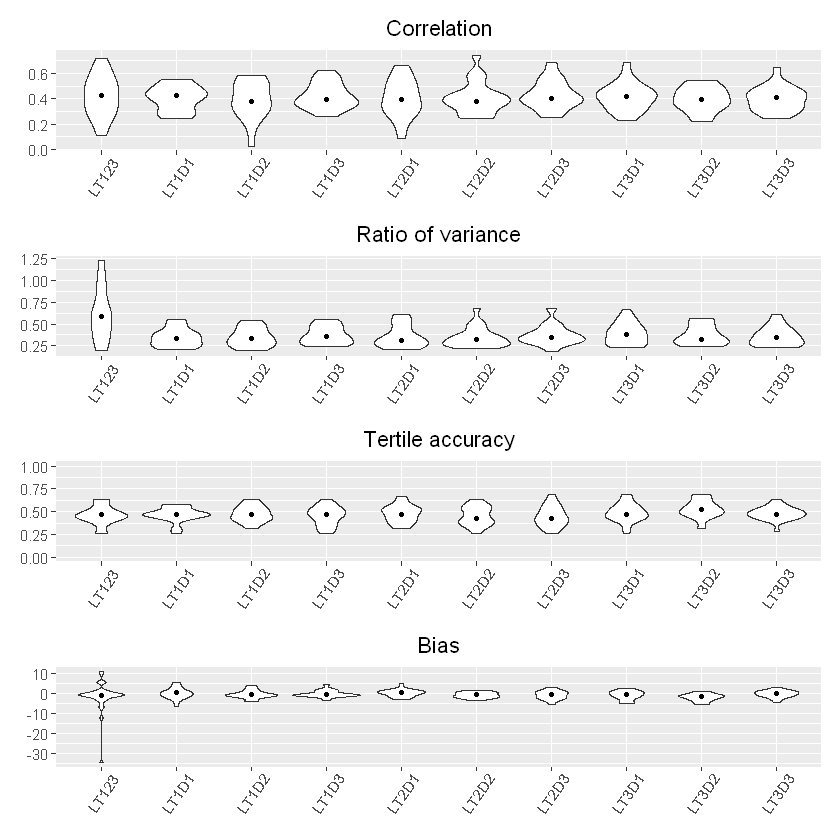

In [24]:
library(reshape)
library(patchwork)

Table.cor <- get.table.violin.plot(8, 'cor')
Table.RVar <- get.table.violin.plot(6, 'RVar')
Table.acc <- get.table.violin.plot(9, 'acc')
Table.bias <- get.table.violin.plot(5, 'bias')

l = list()
l[[1]] <- ggplot(Table.cor, aes(x=Method, y=abs(cor))) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Correlation') + theme(plot.title = element_text(hjust = 0.5)) + theme(axis.text.x = element_text(angle = 55, vjust = .6, size = 9)) + theme(legend.position="none") + theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + labs(colour = '')
l[[2]] <- ggplot(Table.RVar, aes(x=Method, y=RVar)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Ratio of variance') + theme(plot.title = element_text(hjust = 0.5)) + theme(axis.text.x = element_text(angle = 55, vjust = .6, size = 9)) + theme(legend.position="none") + theme(axis.title.x=element_blank(), axis.title.y=element_blank())
l[[3]] <- ggplot(Table.acc, aes(x=Method, y=acc)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Tertile accuracy') + theme(plot.title = element_text(hjust = 0.5)) + theme(axis.text.x = element_text(angle = 55, vjust = .6, size = 9)) + theme(legend.position="none") + theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + ylim(0,1)
l[[4]] <- ggplot(Table.bias , aes(x=Method, y=bias)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Bias') + theme(plot.title = element_text(hjust = 0.5)) + theme(axis.text.x = element_text(angle = 55, vjust = .6, size = 9)) + theme(legend.position="none") + theme(axis.title.x=element_blank(), axis.title.y=element_blank())

l[[1]] / l[[2]] / l[[3]] / l[[4]]

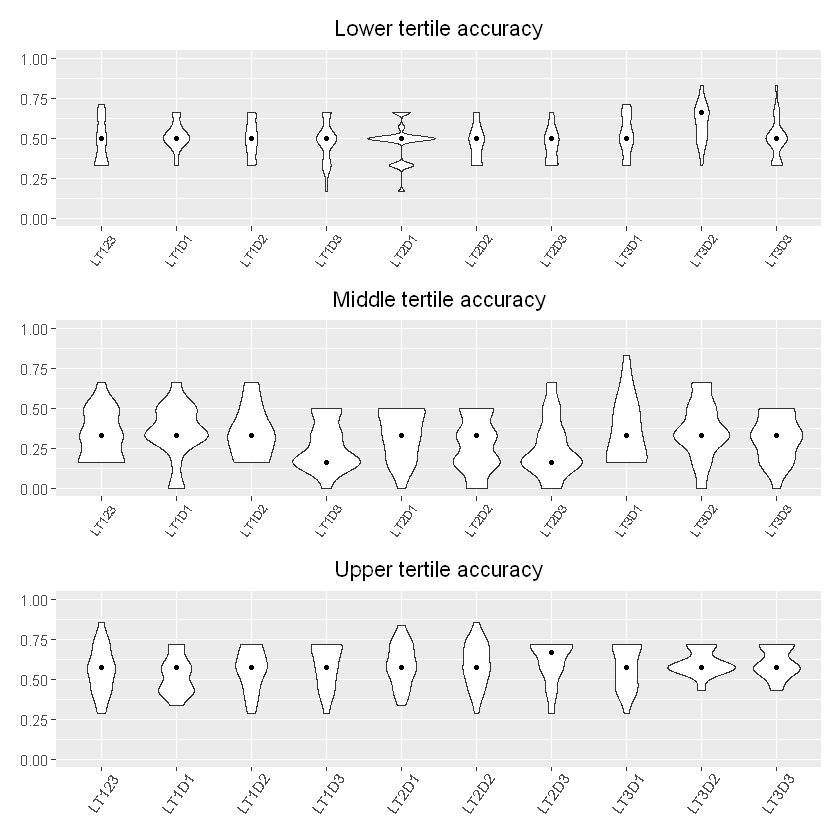

In [26]:
Table.acc1 <- get.table.violin.plot(10, 'acc1')
Table.acc2 <- get.table.violin.plot(11, 'acc2')
Table.acc3 <- get.table.violin.plot(12, 'acc3')

ll = list()
ll[[1]] <- ggplot(Table.acc1, aes(x=Method, y=acc1)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Lower tertile accuracy') + theme(plot.title = element_text(hjust = 0.5)) + theme(axis.text.x = element_text(angle = 55, vjust = .6, size = 7)) + theme(legend.position="none") + theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + ylim(0,1)
ll[[2]] <- ggplot(Table.acc2, aes(x=Method, y=acc2)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Middle tertile accuracy') + theme(plot.title = element_text(hjust = 0.5)) + theme(axis.text.x = element_text(angle = 55, vjust = .6, size = 7)) + theme(legend.position="none") + theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + ylim(0,1)
ll[[3]] <- ggplot(Table.acc3, aes(x=Method, y=acc3)) + geom_violin() + stat_summary(fun=median, geom="point", size = 1) + ggtitle('Upper tertile accuracy') + theme(plot.title = element_text(hjust = 0.5)) + theme(axis.text.x = element_text(angle = 55, vjust = .6, size = 9)) + theme(legend.position = "none") + theme(axis.title.x=element_blank(), axis.title.y=element_blank()) + ylim(0,1)

ll[[1]] / ll[[2]] / ll[[3]]